# Descripción de datos usando Python
Este notebook es una guía paso por paso para algunas de las tareas más comunes para describir datos usando Python. Vamos a utilizar tres paquetes principales para esto:
- Numpy: Además de ser un requisito para muchos otros paquetes, Numpy incluye funciones para matemáticas que no solo son muy rápidas, si no que son perfectas para operar sobre matrices (Arrays)
- Matplotlib y Seaborn: Dos librerías para graficar que incluyen utilidades para casi cualquier tipo de gráfico que quieran crear a partir de datos.
- Pandas: Un "excel virtual" que permite la manipulación de datos y la obtención de muchas medidas estadísticas.

## Paso 0: Instalar paquetes
Si no estás usando colab, o algún import no funciona, es importante asegurar que los paquetes necesarios estén descargados. Esto se hace con la herramienta de pip:

In [8]:
# pip no se corre desde el código, se corre desde la linea de comando de tu IDE. Sin embargo, en jupyter y en colab es posible acceder a tu 
# linea de comando utilizando el simbolo de !
!echo Hello world! This is displaying in your command prompt! # Esto no es un comando de python... es un comando del Command Prompt de windows!
!pip install numpy 
!pip install pandas
!pip install matplotlib
!pip install seaborn

Hello world! This is displaying in your command prompt! # Esto no es un comando de python... es un comando del Command Prompt de windows!


## Paso 1: Importar librerías

In [9]:
# Primero importamos las librerias que vamos a usar. La sintaxis de import es:
# import <libreria> as <nickname>
# El nickname nos permite escribir la libreria con otro nombre en nuestro codigo, normalmente estos son por convencion: np es utilizado por la comunidad
# para numpy, sns para seaborn, etc. 
import numpy as np # numpy.mean([5,3,2]) -> np.mean()
import pandas as pd
import matplotlib.pyplot as plt # matplotlib.pyplot.plot -> plt.plot() Matplotlib por si mismo tiene muchas cosas que no necesitamos, mejor importamos pyplot directamente
import seaborn as sns

## Paso 2: Importando tus datos
La manera más común de compartir datos estructurados en internet es por el uso de **.csv**, o **Comma Separated Values**. Aunque así se llama el tipo de archivo, la característica de los CSVs es que tienen valores delimitados por un identificador -- este puede ser una coma, o un espacio, o cualquier otro valor.

Pandas y numpy tienen formas de cargar estos datos a un dataframe o a un array, respectivamente.

Un **dataframe**, o df, es la manera principal en la que Pandas maneja los datos. Es muy similar a un diccionario, y permite mostrar los datos como si fuera una tabla de excel. Puede trabajar todos los tipos de datos.

Un **array** es la manera principal en la que Numpy maneja los datos. Es básicamente una matriz, y admite casi todas las operaciones matemáticas que numpy tiene. Normalmente, los arrays manejan un solo tipo de datos.

Veamos como utilizar los dos. Primero, asegúrate que el archivo "seattle-weather.csv" se encuentre en tu directorio en el que está este código. Si estas en colab, súbelo a tu instancia.

### Numpy: Carga de datos usando numpy
Numpy permite la carga de archivos de texto (incluyendo .csv) usando la funcion np.loadtxt() y np.genfromtext()

In [10]:
# Aqui usamos una clausa de try...except para demostrar algo. No es necesario que la uses en tu codigo.
# Su proposito es permitir que ciertos errores ocurren sin interrumpir la logica del programa.
try: 
    seattle_weather = np.loadtxt("seattle-weather.csv")
except ValueError:
    print("Uh oh, I cannot read this CSV!")

Uh oh, I cannot read this CSV!


Aquí hay un error! Si utilizamos únicamente la función de np.loadtxt, esto ocurre:

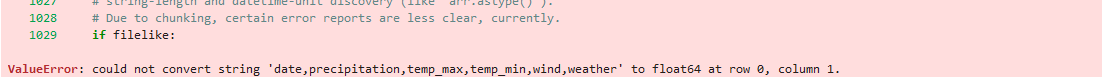

Esto pasa porque loadtxt esta esperando un tipo de datos numérico, y nuestro CSV tiene más que eso:

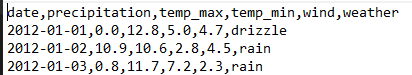

In [11]:
seattle_weather = np.genfromtxt("seattle-weather.csv", names=True, delimiter=",") # fuente: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html
seattle_weather

array([(nan,  0. , 12.8,  5. , 4.7, nan),
       (nan, 10.9, 10.6,  2.8, 4.5, nan),
       (nan,  0.8, 11.7,  7.2, 2.3, nan), ...,
       (nan,  0. ,  7.2,  0.6, 2.6, nan),
       (nan,  0. ,  5.6, -1. , 3.4, nan),
       (nan,  0. ,  5.6, -2.1, 3.5, nan)],
      dtype=[('date', '<f8'), ('precipitation', '<f8'), ('temp_max', '<f8'), ('temp_min', '<f8'), ('wind', '<f8'), ('weather', '<f8')])

Tenemos otro problema: Los datos están mezclados, y por tanto no podemos mezclarlos en un solo array -- esto causa los NaNs! Una posible solución es quitar la primera columna (identificadores) y guardar la última columna en un array diferente. Esto nos puede servir ya que para nuestros propósitos, el clima es muy probablemente nuestra variable objetivo y la vamos a manejar de manera separada.

In [12]:
seattle_weatherX = np.genfromtxt("seattle-weather.csv", delimiter=",", usecols=(1,2,3,4), skip_header=1)
seattle_weatherX

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4],
       [ 0. ,  5.6, -2.1,  3.5]])

In [13]:
seattle_weatherY = np.genfromtxt("seattle-weather.csv", delimiter=",", usecols=(5), skip_header=1, dtype=str)
seattle_weatherY

array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype='<U7')

### Pandas: Carga de datos como dataframes
Pandas tiene la gran ventaja de poder manejar datos combinados, lo cual permite cargar todos los datos en un solo comando y en un solo lugar. Para esto, usamos la función pandas.read_csv()

In [14]:
seattle_weather = pd.read_csv("seattle-weather.csv") # fuente: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Ya que los dataframes son muy similares a los diccionarios, podemos usar los nombres de las columnas durante nuestras operaciones:

In [15]:
seattle_weather["temp_max"].describe()

count    1461.000000
mean       16.439083
std         7.349758
min        -1.600000
25%        10.600000
50%        15.600000
75%        22.200000
max        35.600000
Name: temp_max, dtype: float64

## Paso 3: Explorando datos

De aquí en adelante, nos enfocaremos en usar Pandas para muchas de las tareas descriptivas. Mucho de lo que se puede hacer en Pandas se puede hacer con numpy, y Pandas usa muchas funciones de numpy dentro de su lógica... pero es mucho más sencillo utilizar pandas directamente!

Primero, es importante saber qué tenemos:

In [16]:
seattle_weather.info() # fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


El comando .info() de Pandas nos da mucha de la información esencial de nuestro dataset. 
- Sabemos el rango de indices, de 0 a 1460, lo que nos permite saber que hay 1461 valores.
- Sabemos la cantidad de columnas, 6
- Sabemos cuantos nulos hay (0)
- Sabemos que tipos de datos tenemos: float64 (numéricos) y object (no-numéricos)

En sesiones futuras veremos como manejar los objects y los NaNs... por ahora, veamos que más podemos saber de nuestros datos.

### Graficar
Mucho de los que nos dicen nuestras datos lo podemos saber usando gráficas. La manera más sencilla es usando matplotlib:


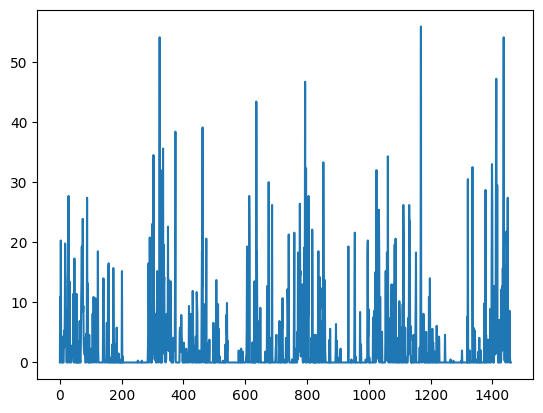

In [17]:
plt.plot(seattle_weather["precipitation"]) # matplotlib: https://matplotlib.org/ 
# matplotlib.pyplot.plot()

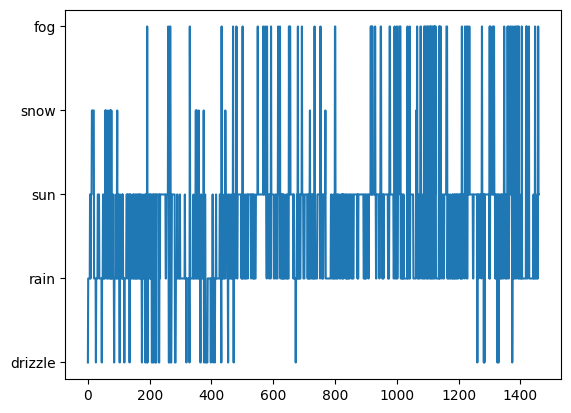

In [18]:
plt.plot(seattle_weather["weather"])

Talvez algunos patrones ya sean visibles... sin embargo, las gráficas pueden ser confusas sin ejes! Veamos si podemos definir los detalles:

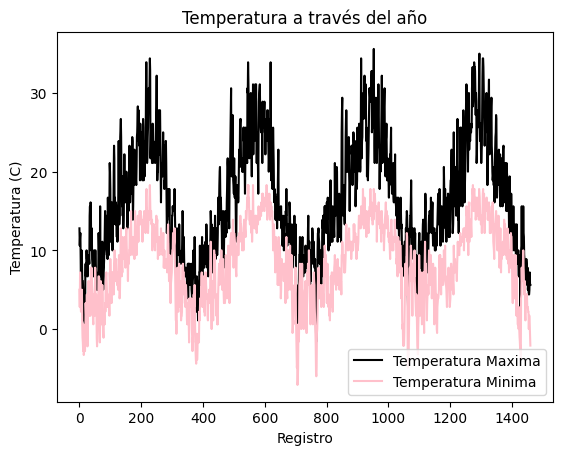

In [19]:
plt.plot(seattle_weather["temp_max"], color="black") # plot(x,y)
plt.plot(seattle_weather["temp_min"], color="pink")
plt.xlabel("Registro")
plt.ylabel("Temperatura (C)")
plt.title("Temperatura a través del año")
plt.legend(["Temperatura Maxima","Temperatura Minima"])

Text(0.5, 1.0, 'Temperatura a través del año')

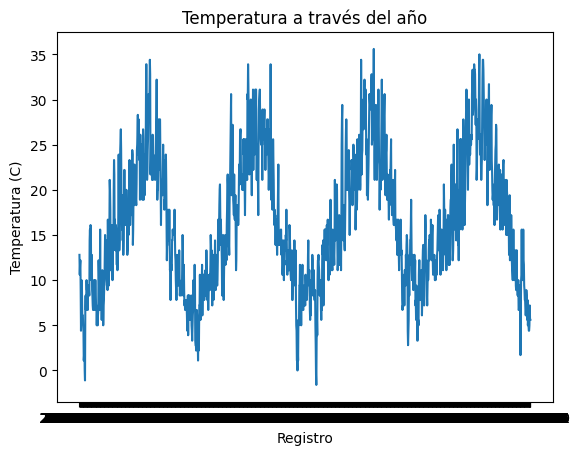

In [20]:
plt.plot(seattle_weather["date"],seattle_weather["temp_max"])
plt.xlabel("Registro")
plt.ylabel("Temperatura (C)")
plt.title("Temperatura a través del año")

Matplotlib puede manejar las fechas para espaciarlas de manera legibles... pero no sabe que son fechas! Transformemos esos datos a un objeto datetime:

In [21]:
seattle_weather["date"] = pd.to_datetime(seattle_weather["date"])

Text(0.5, 1.0, 'Temperatura a través del año')

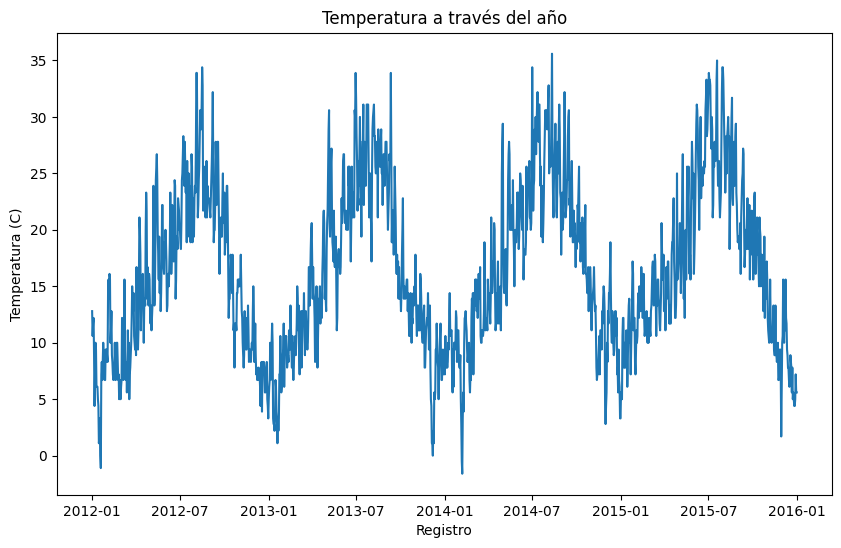

In [22]:
plt.figure(figsize=(10,6)) 
plt.plot(seattle_weather["date"],seattle_weather["temp_max"])
plt.xlabel("Registro")
plt.ylabel("Temperatura (C)")
plt.title("Temperatura a través del año")

También podemos ver otras relaciones...

Text(0.5, 1.0, 'Temperatura vs Precipitacion')

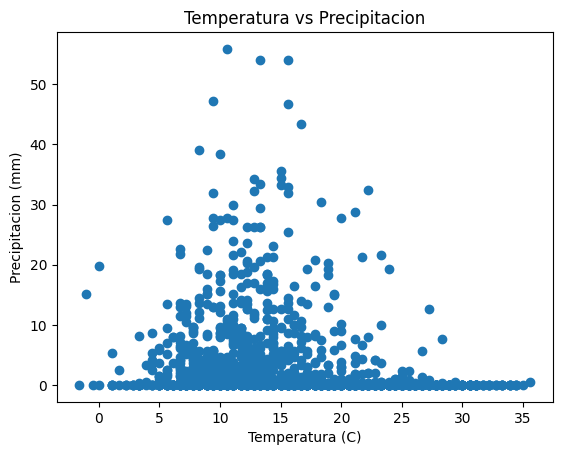

In [23]:
plt.scatter(seattle_weather["temp_max"],seattle_weather["precipitation"])
plt.xlabel("Temperatura (C)")
plt.ylabel("Precipitacion (mm)")
plt.title("Temperatura vs Precipitacion")

### Histogramas con Seaborn
Para algunos valores, es más útil ver qué grupos se repiten más. Para esto nos puede servir un histograma.

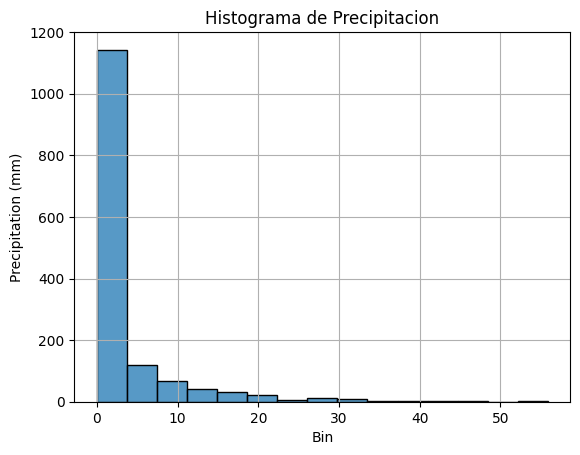

In [24]:
sns.histplot(seattle_weather["precipitation"], bins=15) # fuente: https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.title("Histograma de Precipitacion")
plt.xlabel("Bin")
plt.ylabel("Precipitation (mm)")
plt.grid(True)

### Correlaciones
Algo importante es determinar si hay alguna relación entre las variables que tenemos en nuestro dataset. Para esto, es muy útil ver un mapa de correlaciones. Pandas puede obtener esto de manera automática con el comando .corr, y Seaborn nos puede ayudar a visualizarlo.

In [25]:
c = seattle_weather[["precipitation","temp_max", "temp_min", "wind"]].corr() # fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
c

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228402,-0.072525,0.328021
temp_max,-0.228402,1.000000,0.875687,-0.164857
temp_min,-0.072525,0.875687,1.000000,-0.074185
wind,0.328021,-0.164857,-0.074185,1.000000


Text(0.5, 1.0, 'Hello world!')

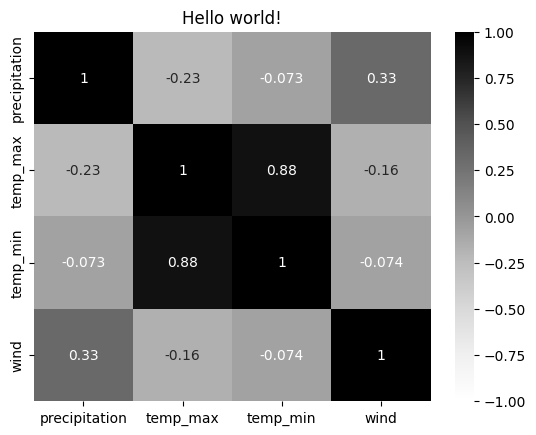

In [26]:
# c = correlaciones, vmin = valor minimo (normalmente -1), vmax = valor maximo (normalmente 1), cmap = mapa de colores
sns.heatmap(c, vmin=-1, vmax=1, annot=True, cmap="Greys") 
plt.title("Hello world!")

## Paso 4: Estadística descriptiva
La historia completa de nuestros datos no solo es cómo se observan: La estadística nos puede dar más ideas de qué está sucediendo. Pandas nos puede dar una descripción estadística breve de nuestros datos con el comando .describe

In [27]:
seattle_weather.describe() # fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.028747,16.439083,8.234771,3.241136
std,6.680454,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Otro factor importante es cómo ver las variables categóricas. Podemos usar barplots y value_counts para determinar si nuestros datos están balanceados o no.

In [28]:
vals = seattle_weather["weather"].value_counts()
vals.keys()

Index(['rain', 'sun', 'fog', 'drizzle', 'snow'], dtype='object')

Text(0, 0.5, 'Cuentas')

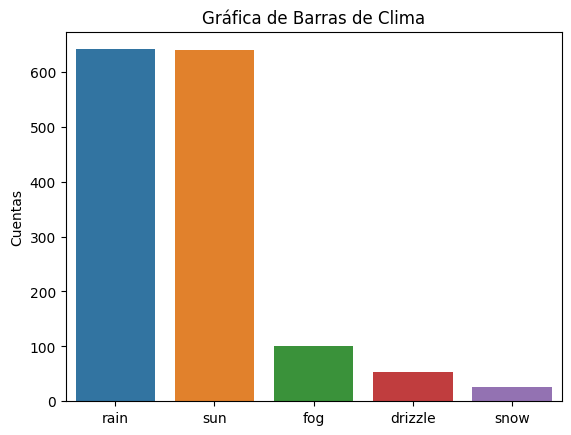

In [29]:
vals_np_array = vals.array
sns.barplot(x=vals.keys(), y=vals_np_array)
plt.title("Gráfica de Barras de Clima")
plt.ylabel("Cuentas")

También podemos hacer uso de otros comandos de pandas como sort_values e indexación con lógica para observar casos particulares de nuestros datos. Por ejemplo, si queremos ver cuánta precipitación hay cuando el clima es "drizzle".

In [30]:
seattle_weather.sort_values(by=["precipitation"], ascending=False)

,date,precipitation,temp_max,temp_min,wind,weather
1169,2015-03-15,55.9,10.6,6.1,4.2,rain
1437,2015-12-08,54.1,15.6,10.0,6.2,rain
323,2012-11-19,54.1,13.3,8.3,6.0,rain
1413,2015-11-14,47.2,9.4,6.1,4.5,rain
794,2014-03-05,46.7,15.6,10.6,3.9,rain
...,...,...,...,...,...,...
647,2013-10-09,0.0,15.0,5.6,1.6,sun
651,2013-10-13,0.0,15.0,6.7,1.8,fog
652,2013-10-14,0.0,15.6,3.9,1.6,sun
653,2013-10-15,0.0,15.6,5.0,0.9,sun


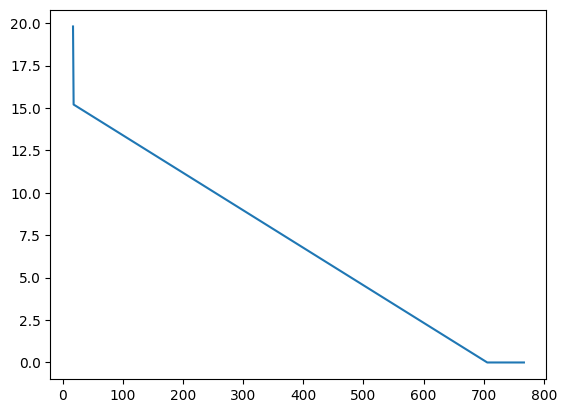

In [31]:
acs = seattle_weather[seattle_weather["temp_max"] <= 0]
plt.plot(acs["precipitation"])

### Boxplots
Una herramienta estadística muy poderosa es el utilizar boxplots. Estos nos permiten ver de manera rápida la mediana, los rangos intercuartiles, mínimos y máximos, y descartar outliers.

<Axes: >

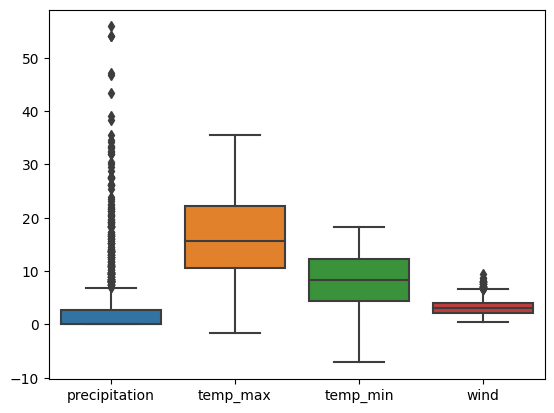

In [32]:
sns.boxplot(data=seattle_weather[["precipitation","temp_max", "temp_min", "wind"]]) # fuente: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: >

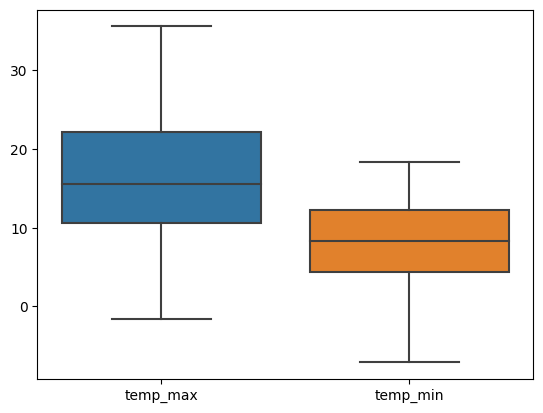

In [33]:
sns.boxplot(data=seattle_weather[["temp_max", "temp_min"]])

Text(0, 0.5, 'Precipitation (mm)')

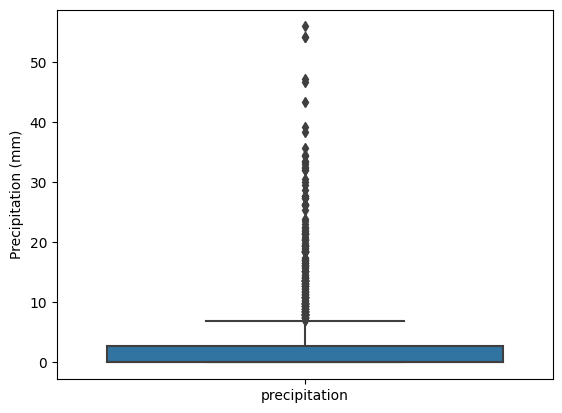

In [34]:
sns.boxplot(data=seattle_weather[["precipitation"]])
plt.ylabel("Precipitation (mm)")

<Axes: >

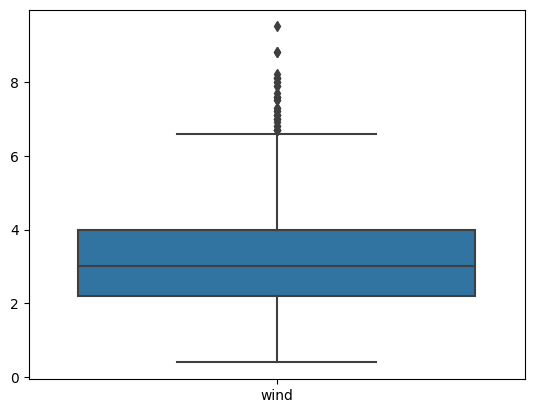

In [35]:
sns.boxplot(data=seattle_weather[["wind"]])

In [36]:
temp = seattle_weather[seattle_weather["precipitation"]>=15]
temp["precipitation"] = seattle_weather["precipitation"].mean()
temp

C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_2348\3494979644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["precipitation"] = seattle_weather["precipitation"].mean()


,date,precipitation,temp_max,temp_min,wind,weather
3,2012-01-04,3.028747,12.2,5.6,4.7,rain
17,2012-01-18,3.028747,0.0,-2.8,5.0,snow
18,2012-01-19,3.028747,-1.1,-2.8,1.6,snow
28,2012-01-29,3.028747,9.4,3.9,4.5,rain
47,2012-02-17,3.028747,10.0,4.4,3.4,rain
...,...,...,...,...,...,...
1437,2015-12-08,3.028747,15.6,10.0,6.2,rain
1441,2015-12-12,3.028747,8.9,5.6,5.6,rain
1446,2015-12-17,3.028747,6.7,3.9,6.0,rain
1447,2015-12-18,3.028747,8.9,4.4,5.1,rain
